In [189]:
import pandas as pd
import sklearn as skl 
import matplotlib.pyplot as plt


In [190]:
df=pd.read_csv('child_iq.csv')

In [191]:
df=df.drop(['Unnamed: 0'],axis=1)



Eliminamos la columna 'Umnamed' al no aportar ningun dato relevante

In [192]:
df.head()

,ppvt,educ_cat,momage
0,120,2,21
1,89,1,17
2,78,2,19
3,42,1,20
4,115,4,26


educ_cat
educación de la madre 1 = sin educación secundaria, 2 = graduado de secundaria, 3 = bachiller, 4 = universitarias

pvt:
puntuación de la prueba infantil

momage:
edad de la madre al momento del parto

In [193]:
df.describe()

,ppvt,educ_cat,momage
count,400.000000,400.000000,400.000000
mean,86.932500,2.112500,22.790000
std,20.440094,0.813325,2.689607
min,20.000000,1.000000,17.000000
25%,74.000000,2.000000,21.000000
50%,90.000000,2.000000,23.000000
75%,102.000000,3.000000,25.000000
max,144.000000,4.000000,29.000000




## Edad de las madres en el momento del parto: 

La edad minima es 17 años

la edad maxima es 29 años

la media de edad son 22.79 años

## La puntuacion de la prueba infantil:

la puntuacion minima es 20 ptos

la puntuacion máxima es 144 ptos

la media es 86.93



In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ppvt      400 non-null    int64
 1   educ_cat  400 non-null    int64
 2   momage    400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [195]:
df.isnull().sum()

ppvt        0
educ_cat    0
momage      0
dtype: int64

No aparecen datos nulos. Todos los datos son numéricos

In [196]:
df.isna().sum()

ppvt        0
educ_cat    0
momage      0
dtype: int64

Tampoco aparecen datos NAN

In [197]:
corr=df.corr()

In [198]:
corr

,ppvt,educ_cat,momage
ppvt,1.000000,0.203227,0.110567
educ_cat,0.203227,1.000000,0.348811
momage,0.110567,0.348811,1.000000


En un análisis de correlación comprobamos que si bien, ni edad ni educacion de la madre son factores determinantes, la formación de la madre (0,20) tiene casi el doble de peso que la edad  de la madre en el momento del parto (0,11)

La edad  de la madre tiene estrecha relacion con la formacion de la misma, pero esto es debido a que una chica de 17 a 20 años no puede tener por edad una carrera universitaria, mientras que otra de mayor edad si. 

## Niveles de educacion de las madres

In [230]:
df['educ_cat'].value_counts()

educ_cat
2    212
1     85
3     76
4     27
Name: count, dtype: int64

In [231]:
(df['educ_cat'].value_counts()/df.value_counts().sum())*100

educ_cat
2    53.00
1    21.25
3    19.00
4     6.75
Name: count, dtype: float64

### Las mujeres con estudios secundarios componen el grupo mas numeroso, con 212 personas, el 53% del total.
### Las seguirian las mujeres sin estudios (21.25%), y con bachiller(19%) 
### El grupo menos numeroso seria el de las universitarias, solo un 6.75%

## Analizaremos ahora el porcentaje de hijos con bajas capacidades en mujeres con diferente formacion

In [199]:
df['ppvt'].describe()

count    400.000000
mean      86.932500
std       20.440094
min       20.000000
25%       74.000000
50%       90.000000
75%      102.000000
max      144.000000
Name: ppvt, dtype: float64

In [200]:
bc_sin_estudios=df[(df['ppvt']<=74.00) & (df['educ_cat']==1)]

In [201]:
porcentaje_bc_sin_estudios=(bc_sin_estudios.value_counts().sum()/df.value_counts().sum()*100)

In [202]:
porcentaje_bc_sin_estudios

7.5

### Un 7´5% de las mujeres sin estudios tienen hijos con bajas capacidades
(menor al cuartil inferior)

In [203]:
bc_secundaria=df[(df['ppvt']<=74.00) & (df['educ_cat']==2)]

In [204]:
porcentaje_bc_secundaria=(bc_secundaria.value_counts().sum()/df.value_counts().sum()*100)

In [205]:
porcentaje_bc_secundaria

12.25

### En el caso de las mujeres con estudios de secundaria estariamos en el 12.25%

In [206]:
bc_bachiller=df[(df['ppvt']<=74.00) & (df['educ_cat']==3)]

In [207]:
porcentaje_bc_bachiller=(bc_bachiller.value_counts().sum()/df.value_counts().sum()*100)

In [208]:
porcentaje_bc_bachiller

4.5

### Para las mujeres con estudios de bachiller seria un porcentaje del 4.5%

In [209]:
bc_universitarias=df[(df['ppvt']<=74.00) & (df['educ_cat']==4)]

In [210]:
porcentaje_bc_universitarias=(bc_universitarias.value_counts().sum()/df.value_counts().sum()*100)

In [211]:
porcentaje_bc_universitarias

1.0

### Un 1% de las mujeres universitarias tienen hijos con bajas capacidades
menor al cuartil inferior

## A continuacion haremos lo mismo pero buscando niños con altas capacidades

In [212]:
ac_sin_estudios=df[(df['ppvt']>=102.00) & (df['educ_cat']==1)]

In [213]:
porcentaje_ac_sin_estudios=(ac_sin_estudios.value_counts().sum()/df.value_counts().sum()*100)

In [214]:
porcentaje_ac_sin_estudios

3.0

### Los niños con altas capacidades de mujeres sin estudios serian el 3%

In [215]:
ac_con_secundaria=df[(df['ppvt']>=102.00) & (df['educ_cat']==2)]

In [216]:
porcentaje_ac_con_secundaria=(ac_con_secundaria.value_counts().sum()/df.value_counts().sum()*100)

In [217]:
porcentaje_ac_con_secundaria

15.0

### En el caso de las mujeres con secundaria seria del 15%

In [218]:
ac_con_bachillerato=df[(df['ppvt']>=102.00) & (df['educ_cat']==3)]

In [219]:
porcentaje_ac_con_bachillerato=(ac_con_bachillerato.value_counts().sum()/df.value_counts().sum()*100)

In [220]:
porcentaje_ac_con_bachillerato

5.25

### Para las mujeres con bachillerato seria del 5.25%

In [221]:
ac_universitarias=df[(df['ppvt']>=102.00) & (df['educ_cat']==4)]

In [222]:
porcentaje_ac_universitarias=(ac_universitarias.value_counts().sum()/df.value_counts().sum()*100)

In [223]:
porcentaje_ac_universitarias

3.0

### Los niños con altas capacidades de mujeres con estudios universitarios serian tambien del 3%

## Representaciones gráficas

In [224]:
labels=['madres sin estudios','madres con secundaria','madres con bachiller','madres universitarias']
sizes=[porcentaje_bc_sin_estudios,porcentaje_bc_secundaria,porcentaje_bc_bachiller,porcentaje_bc_universitarias]
colors=['yellow','red','blue', 'green']

Text(0.5, 1.0, 'Porcentaje niños con bajas capacidades')

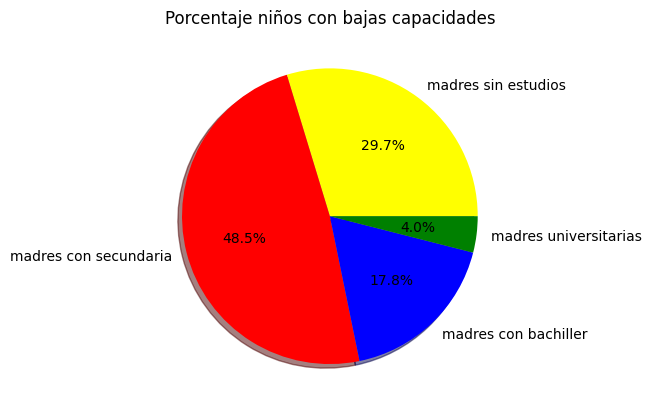

In [225]:
plt.pie(sizes,labels=labels, colors=colors,shadow=True,autopct='%1.1f%%')
plt.title('Porcentaje niños con bajas capacidades')

In [226]:
labels=['madres sin estudios','madres con secundaria','madres con bachiller','madres universitarias']
sizes=[porcentaje_ac_sin_estudios,porcentaje_ac_con_secundaria,porcentaje_ac_con_bachillerato,porcentaje_ac_universitarias]
colors=['yellow','red','blue','green']

Text(0.5, 1.0, 'Porcentaje niños con altas capacidades')

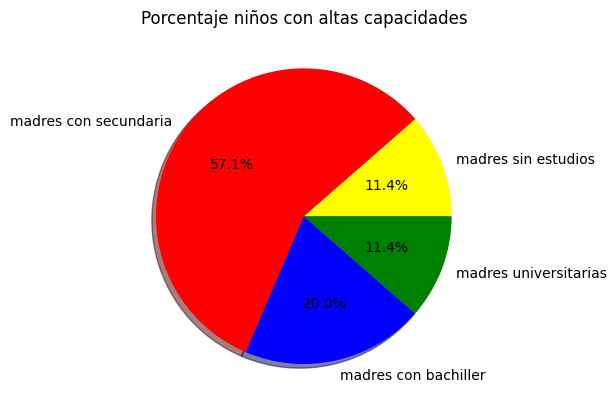

In [227]:
plt.pie(sizes,labels=labels, colors=colors,shadow=True,autopct='%1.1f%%')
plt.title('Porcentaje niños con altas capacidades')